In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading python classes and packages
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt   
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer #loading bert sentence model
from string import punctuation
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
import pickle
from nltk.stem import PorterStemmer
import smote_variants
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential, load_model, Model
import pickle
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
import os

In [ ]:
#loading bert and roberta models
roberta = SentenceTransformer('nli-distilroberta-base-v2')
berts = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
print("Bert & Roberta Model Loaded")

Downloading:   0%|          | 0.00/790 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/679 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/328M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/82.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/82.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/82.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/82.2M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/326M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [5]:
#define classes to perform NLP operations on text such as removing stop words and symbols
#define object to remove stop words and other text processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [6]:
#define function to clean text by removing stop words and other special symbols
def cleanText(doc):
    tokens = doc.split()
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [ps.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = ' '.join(tokens)
    return tokens

In [7]:
#defining global variables to store X and Y training data
X = []
Y = []

In [8]:
#function to read job posting details from given dataset details
def ReadJobData(text_features, labels):
    for i in range(len(text_features)):
        data = str(text_features[i])
        data = data.strip().lower()
        if len(data) > 0:
            data = cleanText(data)
            X.append(data)
            Y.append(labels[i])
            print(str(i)+" "+str(len(X))+" "+str(len(data)))

In [9]:
#loading and displaying all 3 datasets
#loading and displaying fake job posting
dataset1 = pd.read_csv("Dataset/fake_job_postings.csv")
dataset1

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [10]:
#loading and displaying Pakistan job posting
dataset2 = pd.read_csv("Dataset/Pakistan Available Job Dec 19 - Mar-21.csv")
dataset2['label'] = 0
dataset2

,Job Name,label,Company Name,Job Type,Experience Required,Department,JD,City,Date Posted
0,"Full Time New Job Positions .Net, .Netcore, Fl...",0,"Nayel Solutions, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,"New Job Positions .net, .netcore, flutter, Tea...",Islamabad,12-Mar-21
1,Full Time Senior Web Developer Jobs in Pakistan,0,"Eurosoft Tech Private Limited, Pakistan",Full Time Jobs,2 Years Job Exp.,IT Jobs,We are looking for an experienced Web Develope...,Karachi,12-Mar-21
2,Full Time Russian Speakers Jobs in Pakistan,0,"ICM JAPAN, Pakistan",Full Time Jobs,< 1 Year,Customer Service Jobs,International clients dealing exposure (B2B).S...,Karachi,12-Mar-21
3,Full Time Customer Support Specialist - Intern...,0,"ibex, Pakistan",Full Time Jobs,Job for Fresh Graduates,Customer Service Jobs,Responsible for acting as a liaison between ou...,Islamabad,9-Mar-21
4,Full Time English Speaker - International Busi...,0,"ICM JAPAN, Pakistan",Full Time Job,< 1 Year,Customer Service Job,International clients dealing exposure (B2B) a...,Karachi,5-Mar-21
...,...,...,...,...,...,...,...,...,...
6675,Full Time Senior Software Engineer Job in Pak...,0,"KnovaSol, Pakistan",Full Time Job,3 Years Job Exp.,Computer Software Job,We required services of Senior Software Engine...,Islamabad,30-Dec-20
6676,Full Time Commercial Experience Executive Job ...,0,NaN,Full Time Job,2 Years Job Exp.,Admin Job,As one of the leading employers in the country...,Multan,29-Dec-20
6677,Full Time Business Development Executive Job i...,0,"Loop Brackets, Pakistan",Full Time Job,2 Years Job Exp.,Computer Software Job,The ideal candidate will have experience in al...,Lahore,29-Dec-20
6678,Full Time 3D Modeler / CG Artist Game Jobs in ...,0,"Super Duper Studio , Pakistan",Full Time Jobs,2 Years Job Exp.,Computer Software Jobs,Must be able to create 3D Game Environments an...,Lahore,29-Dec-20


In [11]:
#loading and displaying US job posting dataset 3
dataset3 = pd.read_csv("Dataset/marketing_sample_for_trulia_com-real_estate__20190901_20191031__30k_data.csv")
dataset3['label'] = 0
dataset3

,Job Title,Job Description,Job Type,Categories,Location,City,State,Country,Zip Code,Address,...,Employer Logo,Companydescription,Employer Location,Employer City,Employer State,Employer Country,Employer Zip Code,Uniq Id,Crawl Timestamp,label
0,Shift Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_squar...,Del Taco is an American quick service restaura...,"Mission Hills, CA 91345",Mission Hills,CA,United States,91345,511f9a53920f4641d701d51d3589349f,2019-08-24 09:13:18 +0000,0
1,Operations Support Manager,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Atlanta, GA 30342",Atlanta,GA,United States,30342,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Based in Atlanta, FOCUS Brands Inc. is an inno...",NaN,NaN,NaN,United States,NaN,4955daf0a3facbe2acb6c429ba394e6d,2019-09-19 08:16:55 +0000,0
2,Senior Product Manager - Data,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Chicago, IL",Chicago,IL,United States,NaN,NaN,...,NaN,Vibes Corp. reputation was built and establish...,NaN,NaN,NaN,United States,NaN,a0e0d12df1571962b785f17f43ceae12,2019-09-18 02:13:10 +0000,0
3,Part-Time Office Concierge,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Festus, MO",Festus,MO,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,NaN,56e411fd731f76ac916bf4fb169250e9,2019-10-24 16:39:13 +0000,0
4,Print & Marketing Associate,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,"Staples is The Worklife Fulfillment Company, h...","Cedar Rapids, IA 52404",Cedar Rapids,IA,United States,52404,3fff5c0ad6981bf4bff6260bd5feab63,2019-08-24 22:29:10 +0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29997,Bilingual Teller,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Lakewood, CO 80226",Lakewood,CO,United States,80226,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,Moneytree is a family-run business that has be...,NaN,NaN,NaN,United States,NaN,db18d0e2de28df6e1e605a3800ffd574,2019-10-25 22:42:37 +0000,0
29998,"Rental Consultant - Harrison, OH","<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Harrison, OH 45030",Harrison,OH,United States,45030,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,NaN,47f8d7f320223b6f043ef5c345676902,2019-10-25 16:56:18 +0000,0
29999,Product Support Specialist 5,"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"Melbourne, FL 32940",Melbourne,FL,United States,32940,NaN,...,NaN,NaN,NaN,NaN,NaN,United States,NaN,d2a18fb9f52495aa7876d4470e5acc61,2019-10-25 01:39:48 +0000,0
30000,Marketing Strategist (Contract),"<div id=""jobDescriptionText"" class=""jobsearch-...",NaN,NaN,"San Diego, CA",San Diego,CA,United States,NaN,NaN,...,https://d2q79iu7y748jz.cloudfront.net/s/_logo/...,Ajinomoto Bio-Pharma Services is a fully integ...,NaN,NaN,NaN,United States,NaN,ce699d2e94a52dfebb13bcf70ed5ffd7,2019-08-23 15:36:47 +0000,0


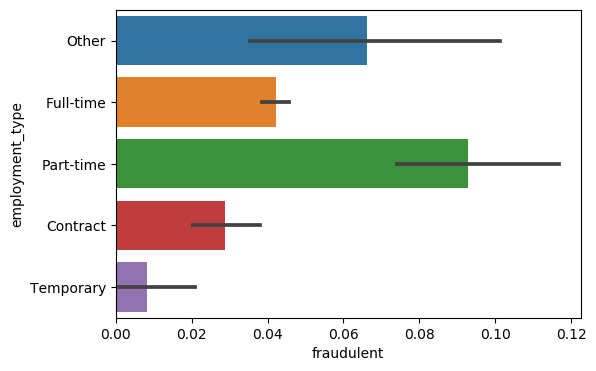

In [12]:
#plot Fraudlent job with respective to employment type
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="fraudulent", y="employment_type", data=dataset1, ax=ax)
plt.show()

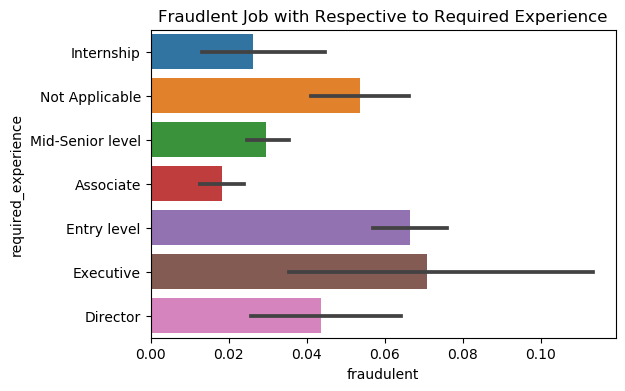

In [13]:
#plot Fraudlent job with respective to required experience
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="fraudulent", y="required_experience", data=dataset1, ax=ax)
plt.title('Fraudlent Job with Respective to Required Experience')
plt.show()

In [14]:
#reading all job details from all 3 datasets and then cleaning and extracting bert and roberta features
if os.path.exists("model/bert_X.npy"):
    bert_X = np.load("model/bert_X.npy")
    roberta_X = np.load("model/roberta_X.npy")
    Y = np.load("model/Y.npy")
else:
    #extracting description and labels from all 3 datasets 
    d1_desc = dataset1['description'].ravel() #extracting description and job details from all 3 datasets
    d2_desc = dataset2['Job Name'].ravel()
    d3_desc = dataset3['Job Description'].ravel()
    d1_label = dataset1['fraudulent'].ravel()
    d2_label = dataset2['label'].ravel()#extracting labels
    d3_label = dataset3['label'].ravel()
    ReadJobData(d1_desc, d1_label)#function to read job details        
    ReadJobData(d2_desc, d2_label)
    ReadJobData(d3_desc, d3_label)
    X = np.asarray(X)
    Y = np.asarray(Y)
    X = np.save("model/X", X)
    Y = np.save("model/Y", Y)
    bert_X = berts.encode(X)#converting all clean text to BERT encoding
    np.save("model/bert_X", bert_X)
    embeddings = roberta.encode(X, convert_to_tensor=True)#converting all text into roberta encoding
    roberta_X = embeddings.numpy()
    np.save("model/roberta_X", roberta_X)
print("Dataset Loading & Cleaning Completed")
print("BERT Encoding from Job Text = "+str(bert_X))
print("ROBERTA Encoding from Job Text = "+str(roberta_X))

Dataset Loading & Cleaning Completed
BERT Encoding from Job Text = [[ 0.13160636  0.77341413  0.47282082 ...  0.02774417  0.3504457
   0.01289647]
 [-0.53001326  0.3272663   0.847138   ...  0.02192378  0.00579906
   0.03752477]
 [-0.40192834  0.21901277  0.80271566 ...  0.0123069   0.4252593
   0.47843233]
 ...
 [-0.82277393  0.6648898   0.6846634  ...  0.30278674  0.12890384
  -0.2318288 ]
 [-1.1105238   0.49619418  0.36308128 ... -0.14341399  0.46923003
   0.3097766 ]
 [ 0.26507664  0.4541028   0.06839894 ... -0.31169182  0.31371292
  -0.25600335]]
ROBERTA Encoding from Job Text = [[ 4.00933743e-01 -7.30267465e-02  3.12919170e-01 ... -4.91309106e-01
  -2.08873391e-01 -3.04655522e-01]
 [ 2.17888638e-01  6.43259671e-04 -1.10955454e-01 ... -3.82170767e-01
   6.62234286e-03 -6.14694417e-01]
 [ 1.77820653e-01 -5.03316462e-01  2.16725975e-01 ... -3.74755144e-01
  -2.02502623e-01 -5.28347850e-01]
 ...
 [-5.73566370e-02  2.91066140e-01  6.48839846e-02 ... -6.92561269e-02
  -1.36740297e-01 -4

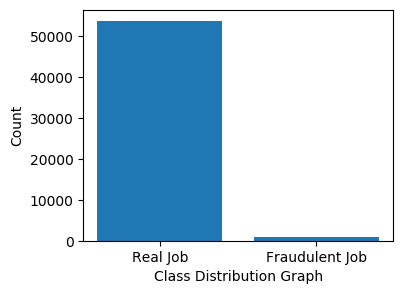

In [15]:
#Binary label calculation based on sub-network similary
#visualizing class labels count found in dataset
names, count = np.unique(Y, return_counts = True)
labels = ['Real Job', 'Fraudulent Job']
height = count
bars = labels
y_pos = np.arange(len(bars))
plt.figure(figsize = (4, 3)) 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.xlabel("Class Distribution Graph")
plt.ylabel("Count")
plt.show()

In [16]:
#dataset preprocessing like shuffling and splitting both bert and roberta embedding into train and test
indices = np.arange(bert_X.shape[0])
np.random.shuffle(indices) #dataset features shuffling
bert_X = bert_X[indices]
roberta_X = roberta_X[indices]
Y = Y[indices]
#splitting into train and test
bert_X_train, bert_X_test, bert_y_train, bert_y_test = train_test_split(bert_X, Y, test_size=0.2) #split dataset into train and test
roberta_X_train, roberta_X_test, roberta_y_train, roberta_y_test = train_test_split(roberta_X, Y, test_size=0.2) #split dataset into train and test
bert = np.load("model/bert.npy", allow_pickle=True)
bert_X_train, bert_X_test, bert_y_train, bert_y_test = bert
roberta = np.load("model/roberta.npy", allow_pickle=True)
roberta_X_train, roberta_X_test, roberta_y_train, roberta_y_test = roberta
bert_y_train = to_categorical(bert_y_train)#one hot encoding
bert_y_test = to_categorical(bert_y_test)
roberta_y_train = to_categorical(roberta_y_train)
roberta_y_test = to_categorical(roberta_y_test)
print("Dataset Train & Test Split Details")
print("80% BERT features used to train algorithms : "+str(bert_X_train.shape[0]))
print("20% BERT features used to test algorithms : "+str(bert_X_test.shape[0]))

Dataset Train & Test Split Details
80% BERT features used to train algorithms : 43648
20% BERT features used to test algorithms : 10913


In [17]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

ML_Model = []
acc = []
prec = []
rec = []
f1 = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc.append(round(a, 3))
    prec.append(round(b, 3))
    rec.append(round(c, 3))
    f1.append(round(d, 3))

In [18]:
#function to calculate accuracy and other metrics
def calculateMetrics(algorithm, predict, y_test):
    a = accuracy_score(y_test,predict)*100
    p = precision_score(y_test, predict,average='macro') * 100
    r = recall_score(y_test, predict,average='macro') * 100
    f = f1_score(y_test, predict,average='macro') * 100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  :  "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FScore    : "+str(f))    
    conf_matrix = confusion_matrix(y_test, predict) 
    plt.figure(figsize =(4, 3)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.xticks(rotation=90)
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()    

Propose BERT + Actual Data Accuracy  :  98.3872445706955
Propose BERT + Actual Data Precision : 49.19362228534775
Propose BERT + Actual Data Recall    : 50.0
Propose BERT + Actual Data FScore    : 49.59353348729792


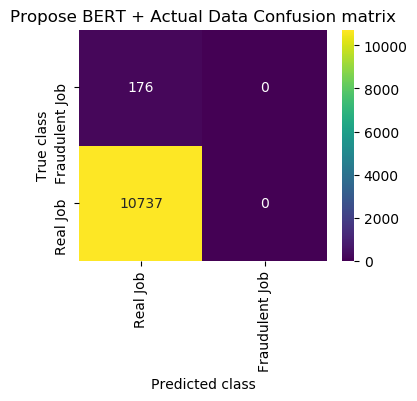

In [19]:
#training actual BERT features without SMOBD using Neural Network
#defining dense, dropout layers to train neural network with BERT and actual data 
bert_cls = Sequential()
bert_cls.add(Dense(50, input_shape=(bert_X_train.shape[1],)))
bert_cls.add(Activation('relu'))
bert_cls.add(Dropout(0.3))
bert_cls.add(Dense(50))
bert_cls.add(Activation('relu'))
bert_cls.add(Dropout(0.3))
bert_cls.add(Dense(bert_y_train.shape[1], activation = 'softmax'))
#compiling, training and loading model
bert_cls.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/bert_cls.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/bert_cls.hdf5', verbose = 1, save_best_only = True)
    bert_cls.fit(bert_X_train, bert_y_train, batch_size = 32, epochs = 10, validation_data=(bert_X_test, bert_y_test), callbacks=[model_check_point], verbose=1)
else:
    bert_cls.load_weights("model/bert_cls.hdf5")
#perform prediction on test data    
predict = bert_cls.predict(bert_X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(bert_y_test, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("Propose BERT + Actual Data", predict, y_test1)

In [20]:
ml_acc = accuracy_score(predict, y_test1)
ml_prec = precision_score(predict, y_test1,average='macro')
ml_rec = recall_score(predict, y_test1,average='macro')
ml_f1 = f1_score(predict, y_test1,average='macro')

storeResults('Propose BERT + Actual Data',ml_acc,ml_prec,ml_rec,ml_f1)

Propose ROBERTA + Actual Data Accuracy  :  98.49720516814808
Propose ROBERTA + Actual Data Precision : 49.24860258407404
Propose ROBERTA + Actual Data Recall    : 50.0
Propose ROBERTA + Actual Data FScore    : 49.621456929184745


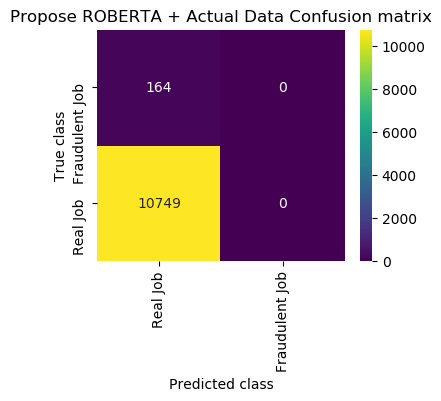

In [21]:
#training roberta actual data using neural network
roberta_cls = Sequential()
roberta_cls.add(Dense(50, input_shape=(roberta_X_train.shape[1],)))
roberta_cls.add(Activation('relu'))
roberta_cls.add(Dropout(0.3))
roberta_cls.add(Dense(50))
roberta_cls.add(Activation('relu'))
roberta_cls.add(Dropout(0.3))
roberta_cls.add(Dense(roberta_y_train.shape[1], activation = 'softmax'))
#compiling, training and loading model
roberta_cls.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/roberta_cls.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/roberta_cls.hdf5', verbose = 1, save_best_only = True)
    roberta_cls.fit(roberta_X_train, roberta_y_train, batch_size = 32, epochs = 10, validation_data=(roberta_X_test, roberta_y_test), callbacks=[model_check_point], verbose=1)
else:
    roberta_cls.load_weights("model/roberta_cls.hdf5")
#perform prediction on test data   
predict = roberta_cls.predict(roberta_X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(roberta_y_test, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("Propose ROBERTA + Actual Data", predict, y_test1)

In [22]:
ml_acc = accuracy_score(predict, y_test1)
ml_prec = precision_score(predict, y_test1,average='macro')
ml_rec = recall_score(predict, y_test1,average='macro')
ml_f1 = f1_score(predict, y_test1,average='macro')

storeResults('Propose ROBERTA + Actual Data',ml_acc,ml_prec,ml_rec,ml_f1)

In [23]:
#now applying SMOBD SMOTE oversampling algorithm to generate synthectic data for under sample classes
print("Total records exists in dataset before applying SMOBD SMOTE = "+str(bert_X_train.shape[0]))
oversampler = smote_variants.SMOBD()
bert_X_train, bert_y_train = oversampler.sample(bert_X_train, np.argmax(bert_y_train, axis=1))
oversampler = smote_variants.SMOBD()
roberta_X_train, roberta_y_train = oversampler.sample(roberta_X_train, np.argmax(roberta_y_train, axis=1))
bert_y_train = to_categorical(bert_y_train)
roberta_y_train = to_categorical(roberta_y_train)
print("Total records exists in dataset after applying SMOBD SMOTE = "+str(bert_X_train.shape[0]))

2024-11-23 22:03:04,843:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'nn_params': {}, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOBD'}")


Total records exists in dataset before applying SMOBD SMOTE = 43648


2024-11-23 22:03:05,476:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2024-11-23 22:03:05,507:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2024-11-23 22:03:05,915:INFO:NearestNeighborsWithMetricTensor: radius neighbors query minkowski
2024-11-23 22:03:07,136:INFO:SMOBD: Running sampling via ('SMOBD', "{'proportion': 1.0, 'eta1': 0.5, 't': 1.8, 'min_samples': 5, 'nn_params': {}, 'max_eps': 1.0, 'n_jobs': 1, 'random_state': None, 'class_name': 'SMOBD'}")
2024-11-23 22:03:07,803:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2024-11-23 22:03:07,835:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2024-11-23 22:03:08,223:INFO:NearestNeighborsWithMetricTensor: radius neighbors query minkowski


Total records exists in dataset after applying SMOBD SMOTE = 85918


Propose BERT + SMOBD SMOTE Data Accuracy  :  98.66214606432695
Propose BERT + SMOBD SMOTE Data Precision : 78.33953849746703
Propose BERT + SMOBD SMOTE Data Recall    : 83.39236349242636
Propose BERT + SMOBD SMOTE Data FScore    : 80.6491300174113


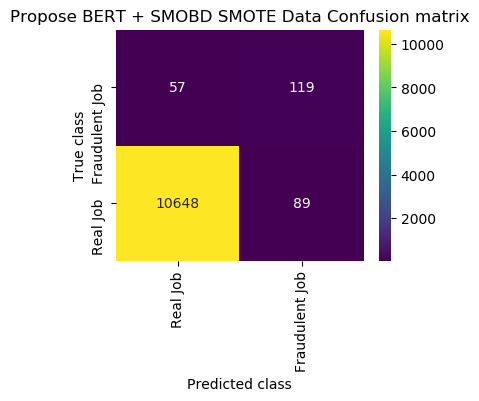

In [24]:
#training BERT with SMOBD SMOTE oversampling records
smobd_bert_cls = Sequential()
smobd_bert_cls.add(Dense(50, input_shape=(bert_X_train.shape[1],)))
smobd_bert_cls.add(Activation('relu'))
smobd_bert_cls.add(Dropout(0.3))
smobd_bert_cls.add(Dense(50))
smobd_bert_cls.add(Activation('relu'))
smobd_bert_cls.add(Dropout(0.3))
smobd_bert_cls.add(Dense(bert_y_train.shape[1], activation = 'softmax'))
#compiling, training and loading model
smobd_bert_cls.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/smobd_bert_cls.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/smobd_bert_cls.hdf5', verbose = 1, save_best_only = True)
    smobd_bert_cls.fit(bert_X_train, bert_y_train, batch_size = 32, epochs = 10, validation_data=(bert_X_test, bert_y_test), callbacks=[model_check_point], verbose=1)
else:
    smobd_bert_cls.load_weights("model/smobd_bert_cls.hdf5")
#perform prediction on test data 
predict = smobd_bert_cls.predict(bert_X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(bert_y_test, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("Propose BERT + SMOBD SMOTE Data", predict, y_test1)

In [25]:
ml_acc = accuracy_score(predict, y_test1)
ml_prec = precision_score(predict, y_test1,average='macro')
ml_rec = recall_score(predict, y_test1,average='macro')
ml_f1 = f1_score(predict, y_test1,average='macro')

storeResults('Propose BERT + SMOBD Smote Data',ml_acc,ml_prec,ml_rec,ml_f1)

Propose ROBERTA + SMOBD SMOTE Data Accuracy  :  98.57967561623752
Propose ROBERTA + SMOBD SMOTE Data Precision : 75.77193746842603
Propose ROBERTA + SMOBD SMOTE Data Recall    : 85.76881230017995
Propose ROBERTA + SMOBD SMOTE Data FScore    : 79.9183062811633


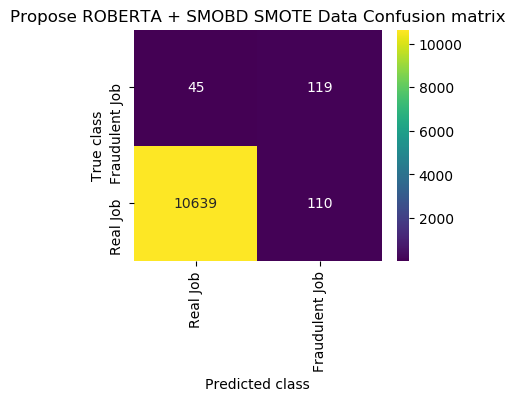

In [26]:
#training ROBERTA with SMOBD SMOTE oversampling records
smobd_roberta_cls = Sequential()
smobd_roberta_cls.add(Dense(50, input_shape=(roberta_X_train.shape[1],)))
smobd_roberta_cls.add(Activation('relu'))
smobd_roberta_cls.add(Dropout(0.3))
smobd_roberta_cls.add(Dense(50))
smobd_roberta_cls.add(Activation('relu'))
smobd_roberta_cls.add(Dropout(0.3))
smobd_roberta_cls.add(Dense(roberta_y_train.shape[1], activation = 'softmax'))
#compiling, training and loading model
smobd_roberta_cls.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/smobd_roberta_cls.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/smobd_roberta_cls.hdf5', verbose = 1, save_best_only = True)
    smobd_roberta_cls.fit(roberta_X_train, roberta_y_train, batch_size = 32, epochs = 10, validation_data=(roberta_X_test, roberta_y_test), callbacks=[model_check_point], verbose=1)
else:
    smobd_roberta_cls.load_weights("model/smobd_roberta_cls.hdf5")
#perform prediction on test data
predict = smobd_roberta_cls.predict(roberta_X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(roberta_y_test, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("Propose ROBERTA + SMOBD SMOTE Data", predict, y_test1)

In [27]:
ml_acc = accuracy_score(predict, y_test1)
ml_prec = precision_score(predict, y_test1,average='macro')
ml_rec = recall_score(predict, y_test1,average='macro')
ml_f1 = f1_score(predict, y_test1,average='macro')

storeResults('Propose RoBERTa + SMOBD Smote Data',ml_acc,ml_prec,ml_rec,ml_f1)

Extension BERT + SMOBD SMOTE + CNN2D Accuracy  :  98.68047283056904
Extension BERT + SMOBD SMOTE + CNN2D Precision : 78.71996639596752
Extension BERT + SMOBD SMOTE + CNN2D Recall    : 82.56337473646778
Extension BERT + SMOBD SMOTE + CNN2D FScore    : 80.5153994941229


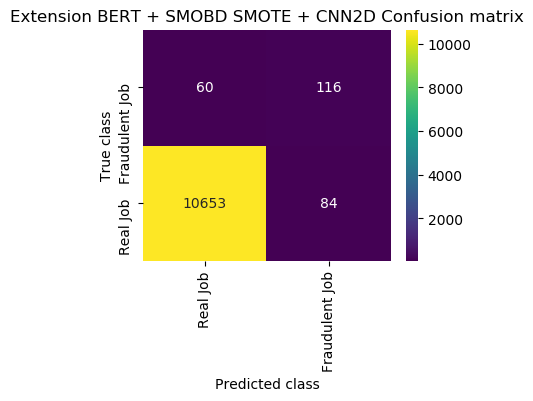

In [28]:
#training BERT SMOBD SMOTE data using extension CNN2D algorithm as this CNN2D will filter features using 2 dimension layer
#so it will optimize and select best features with more accuracy compare to single dimension or normal CNN
bert_X_train = np.reshape(bert_X_train, (bert_X_train.shape[0], 32, 24, 1))
bert_X_test = np.reshape(bert_X_test, (bert_X_test.shape[0], 32, 24, 1))
extension_cnn2d = Sequential()
extension_cnn2d.add(Convolution2D(32, (3 , 3), input_shape = (bert_X_train.shape[1], bert_X_train.shape[2], bert_X_train.shape[3]), activation = 'relu'))
extension_cnn2d.add(MaxPooling2D(pool_size = (2, 2)))
extension_cnn2d.add(Convolution2D(32, (3, 3), activation = 'relu'))
extension_cnn2d.add(MaxPooling2D(pool_size = (2, 2)))
extension_cnn2d.add(Flatten())
extension_cnn2d.add(Dense(units = 256, activation = 'relu'))
extension_cnn2d.add(Dense(units = bert_y_train.shape[1], activation = 'softmax'))
#compiling, training and loading model
extension_cnn2d.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
if os.path.exists("model/cnn2d_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='model/cnn2d_weights.hdf5', verbose = 1, save_best_only = True)
    hist = extension_cnn2d.fit(bert_X_train, bert_y_train, batch_size = 32, epochs = 10, validation_data=(bert_X_test, bert_y_test), callbacks=[model_check_point], verbose=1)      
else:
    extension_cnn2d.load_weights("model/cnn2d_weights.hdf5")
#perform prediction on test data
predict = extension_cnn2d.predict(bert_X_test)
predict = np.argmax(predict, axis=1)
y_test1 = np.argmax(bert_y_test, axis=1)
#call this function to calculate accuracy and other metrics
calculateMetrics("Extension BERT + SMOBD SMOTE + CNN2D", predict, y_test1)

In [29]:
ml_acc = accuracy_score(predict, y_test1)
ml_prec = precision_score(predict, y_test1,average='macro')
ml_rec = recall_score(predict, y_test1,average='macro')
ml_f1 = f1_score(predict, y_test1,average='macro')

storeResults('Extension BERT + SMOBD SMOTE + CNN2D',ml_acc,ml_prec,ml_rec,ml_f1)

# Comparison

In [30]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : acc,
                       'Precision': prec, 
                       'f1_score' : f1,
                        'Recall'   : rec,
                        
                      })

In [31]:
result

,ML Model,Accuracy,Precision,f1_score,Recall
0,Propose BERT + Actual Data,0.984,0.500,0.496,0.492
1,Propose ROBERTA + Actual Data,0.985,0.500,0.496,0.492
2,Propose BERT + SMOBD Smote Data,0.987,0.834,0.806,0.783
3,Propose RoBERTa + SMOBD Smote Data,0.986,0.858,0.799,0.758
4,Extension BERT + SMOBD SMOTE + CNN2D,0.987,0.826,0.805,0.787


# Graph

In [32]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

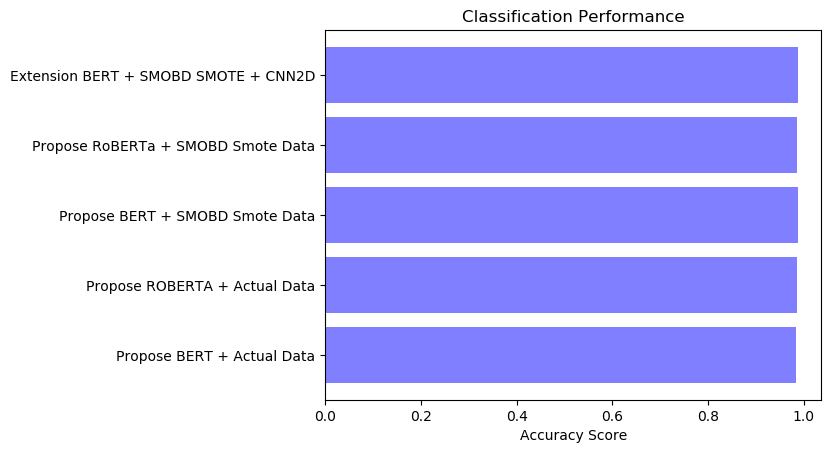

In [33]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, acc, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

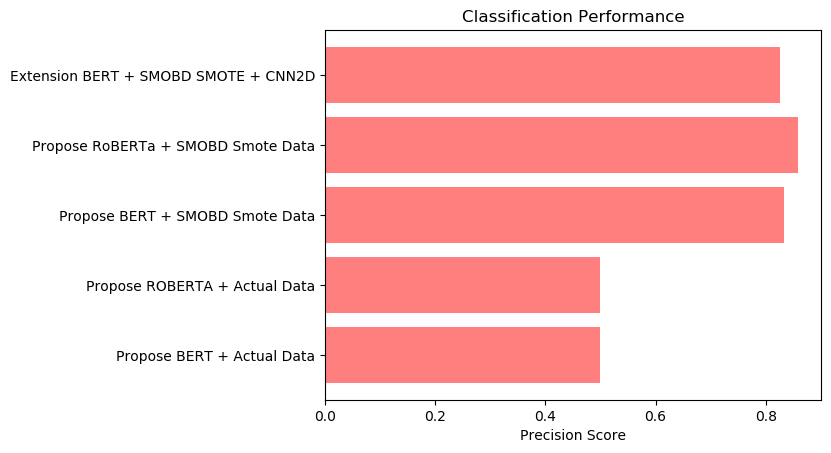

In [34]:
plt2.barh(y_pos, prec, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

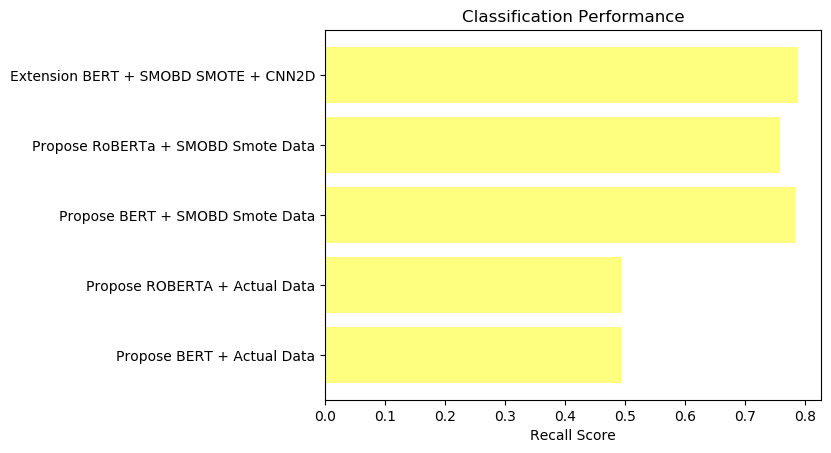

In [35]:
plt2.barh(y_pos, rec, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

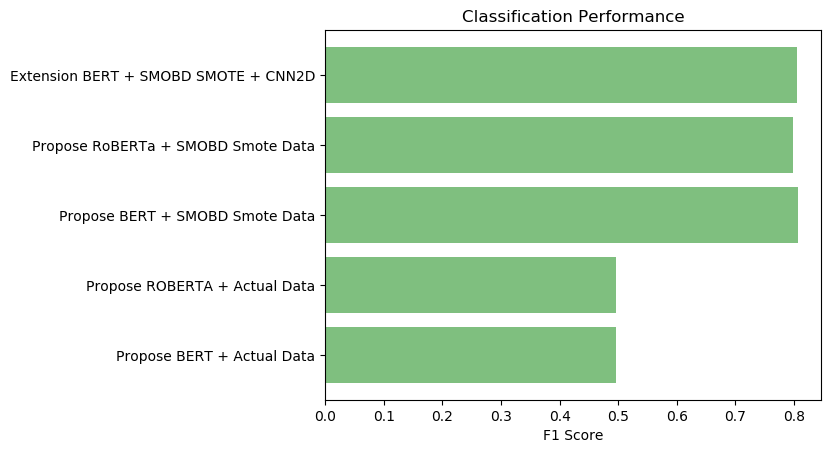

In [36]:
plt2.barh(y_pos, f1, align='center', alpha=0.5,color='green')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()